### Q1(a): Use your decision tree learner to learn a decision tree based on all 14 instances. Print the tree if your software easily allows this or hand type it if not. Do you get the same decision tree as the one in Slide 8 of the Decision Tree lecture notes? If not, find out why (it may be because the learner is using a different information gain measure).


In [1]:
# importing packages

from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn import tree
from sklearn import preprocessing as pre
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from time import time
from sklearn.model_selection import GridSearchCV, train_test_split, LeaveOneOut, cross_val_score, validation_curve
from sklearn.metrics import accuracy_score

In [2]:
# reading data

tennis = pd.read_csv('./datasets/tennis.csv')
tennis.head(14)

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [3]:
tennis.describe()

,outlook,temp,humidity,windy,play
count,14,14,14,14,14
unique,3,3,2,2,2
top,rainy,mild,high,False,yes
freq,5,6,7,8,9


In [4]:
# label encoding 

le = pre.LabelEncoder()
tennis = tennis.apply(le.fit_transform)
tennis

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [5]:
# separate covariables vector (x) and target label (y)

uni_label = 'play'

X = tennis.drop(uni_label, axis=1)
y = tennis[uni_label]
del uni_label

In [6]:
# covariables vector(s)

X

,outlook,temp,humidity,windy
0,2,1,0,0
1,2,1,0,1
2,0,1,0,0
3,1,2,0,0
4,1,0,1,0
5,1,0,1,1
6,0,0,1,1
7,2,2,0,0
8,2,0,1,0
9,1,2,1,0


In [7]:
# target label (y)

y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int32

In [8]:
# instantiate a Decision Tree Classifier Object

tennis_model = DTC()

In [9]:
%%time
# learn the tree from entire dataset (14 tuples)

tennis_model.fit(X,y)

Wall time: 22 ms


DecisionTreeClassifier()

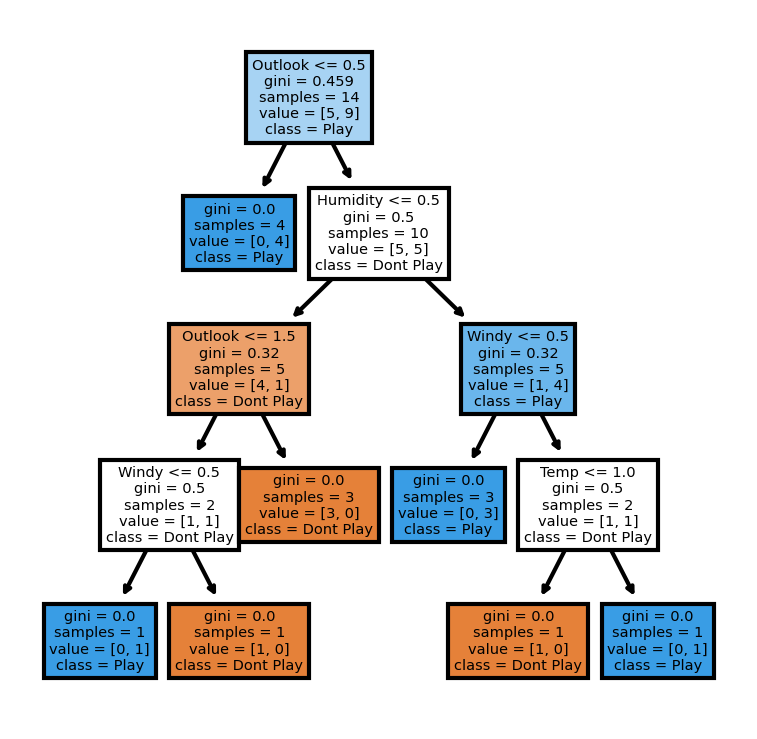

In [10]:
feature_names = ['Outlook', 'Temp', 'Humidity', 'Windy']
class_names = ['Dont Play', 'Play']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)
tree.plot_tree(tennis_model, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()

### Q1 (b): Use the leave-one-out cross-validation method described in class to estimate the error of the decision tree. You can do this manually by removing one example at a time and training on the remaining 13 and then testing on the one you removed, or you can use the package to do this for you automatically by asking for a 14-fold cross-validation if the package supports cross-validation (almost all packages do).

In [45]:
# leave one out cross validation 

accuracy = []
for i in range(len(X)):
    
    # initialize the tree object
    tennis_model = DTC()
    
    # leave one out train-test split 
    X_train = X.drop(i)
    y_train = y.drop(i)
    X_test = X.iloc[i]
    y_test = y.iloc[i]
    
    # learn the tree on training data
    tennis_model.fit(X_train, y_train)
    
    # predict on test data
    y_pred = tennis_model.predict(np.array(X_test).reshape(1,-1))
    
    # store accuracy
    accuracy.append(accuracy_score([y_test], y_pred))

In [49]:
np.mean(accuracy), sum(accuracy)

(0.7142857142857143, 10.0)

In [47]:
# specify cross validation scheme 

cv = LeaveOneOut()
scores = cross_val_score(tennis_model, X, y, cv=LeaveOneOut(), scoring='accuracy')

In [48]:
np.mean(scores), sum(scores)

(0.6428571428571429, 9.0)

### Q2 (a) Use your full data-set to learn a decision tree. Give the tree, the error on the training set and the time needed for learning (if your package gives the learning time). Do not use pruning

In [50]:
# read data

features = ['Clump_Thickness', 'Cell_Size_Uni', 'Cell_Shape_Uni', 'Marginal_Adhesion',
 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoi', 'Mitoses', 'Class']
bcd = pd.read_csv('./datasets/breast_cancer/breast-cancer-wisconsin.data', names=features)
bcd.head()

,Clump_Thickness,Cell_Size_Uni,Cell_Shape_Uni,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoi,Mitoses,Class
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


In [51]:
# specifying missing values as NaNs

bcd['Bare_Nuclei'] = bcd['Bare_Nuclei'].replace('?', np.NaN)

In [52]:
# data summary

bcd = bcd.astype(float)
bcd.describe()

,Clump_Thickness,Cell_Size_Uni,Cell_Shape_Uni,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoi,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [53]:
# dropping tuples with null values

bcd = bcd.dropna()
bcd.describe()

,Clump_Thickness,Cell_Size_Uni,Cell_Shape_Uni,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoi,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [54]:
# separate covariables vector (x) and target label (y)

uni_label = 'Class'

X = bcd.drop([uni_label], axis=1)
y = bcd[uni_label]
del uni_label

In [55]:
X

,Clump_Thickness,Cell_Size_Uni,Cell_Shape_Uni,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoi,Mitoses
1000025,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
1002945,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0
1015425,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0
1016277,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0
1017023,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
776715,3.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0
841769,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
888820,5.0,10.0,10.0,3.0,7.0,3.0,8.0,10.0,2.0
897471,4.0,8.0,6.0,4.0,3.0,4.0,10.0,6.0,1.0


In [56]:
y

1000025    2.0
1002945    2.0
1015425    2.0
1016277    2.0
1017023    2.0
          ... 
776715     2.0
841769     2.0
888820     4.0
897471     4.0
897471     4.0
Name: Class, Length: 683, dtype: float64

In [57]:
# instantiate a Decision Tree Classifier Object

bcd_model = DTC()

In [58]:
%%time
# learn the tree from entire dataset

bcd_model.fit(X, y)

Wall time: 8.86 ms


DecisionTreeClassifier()

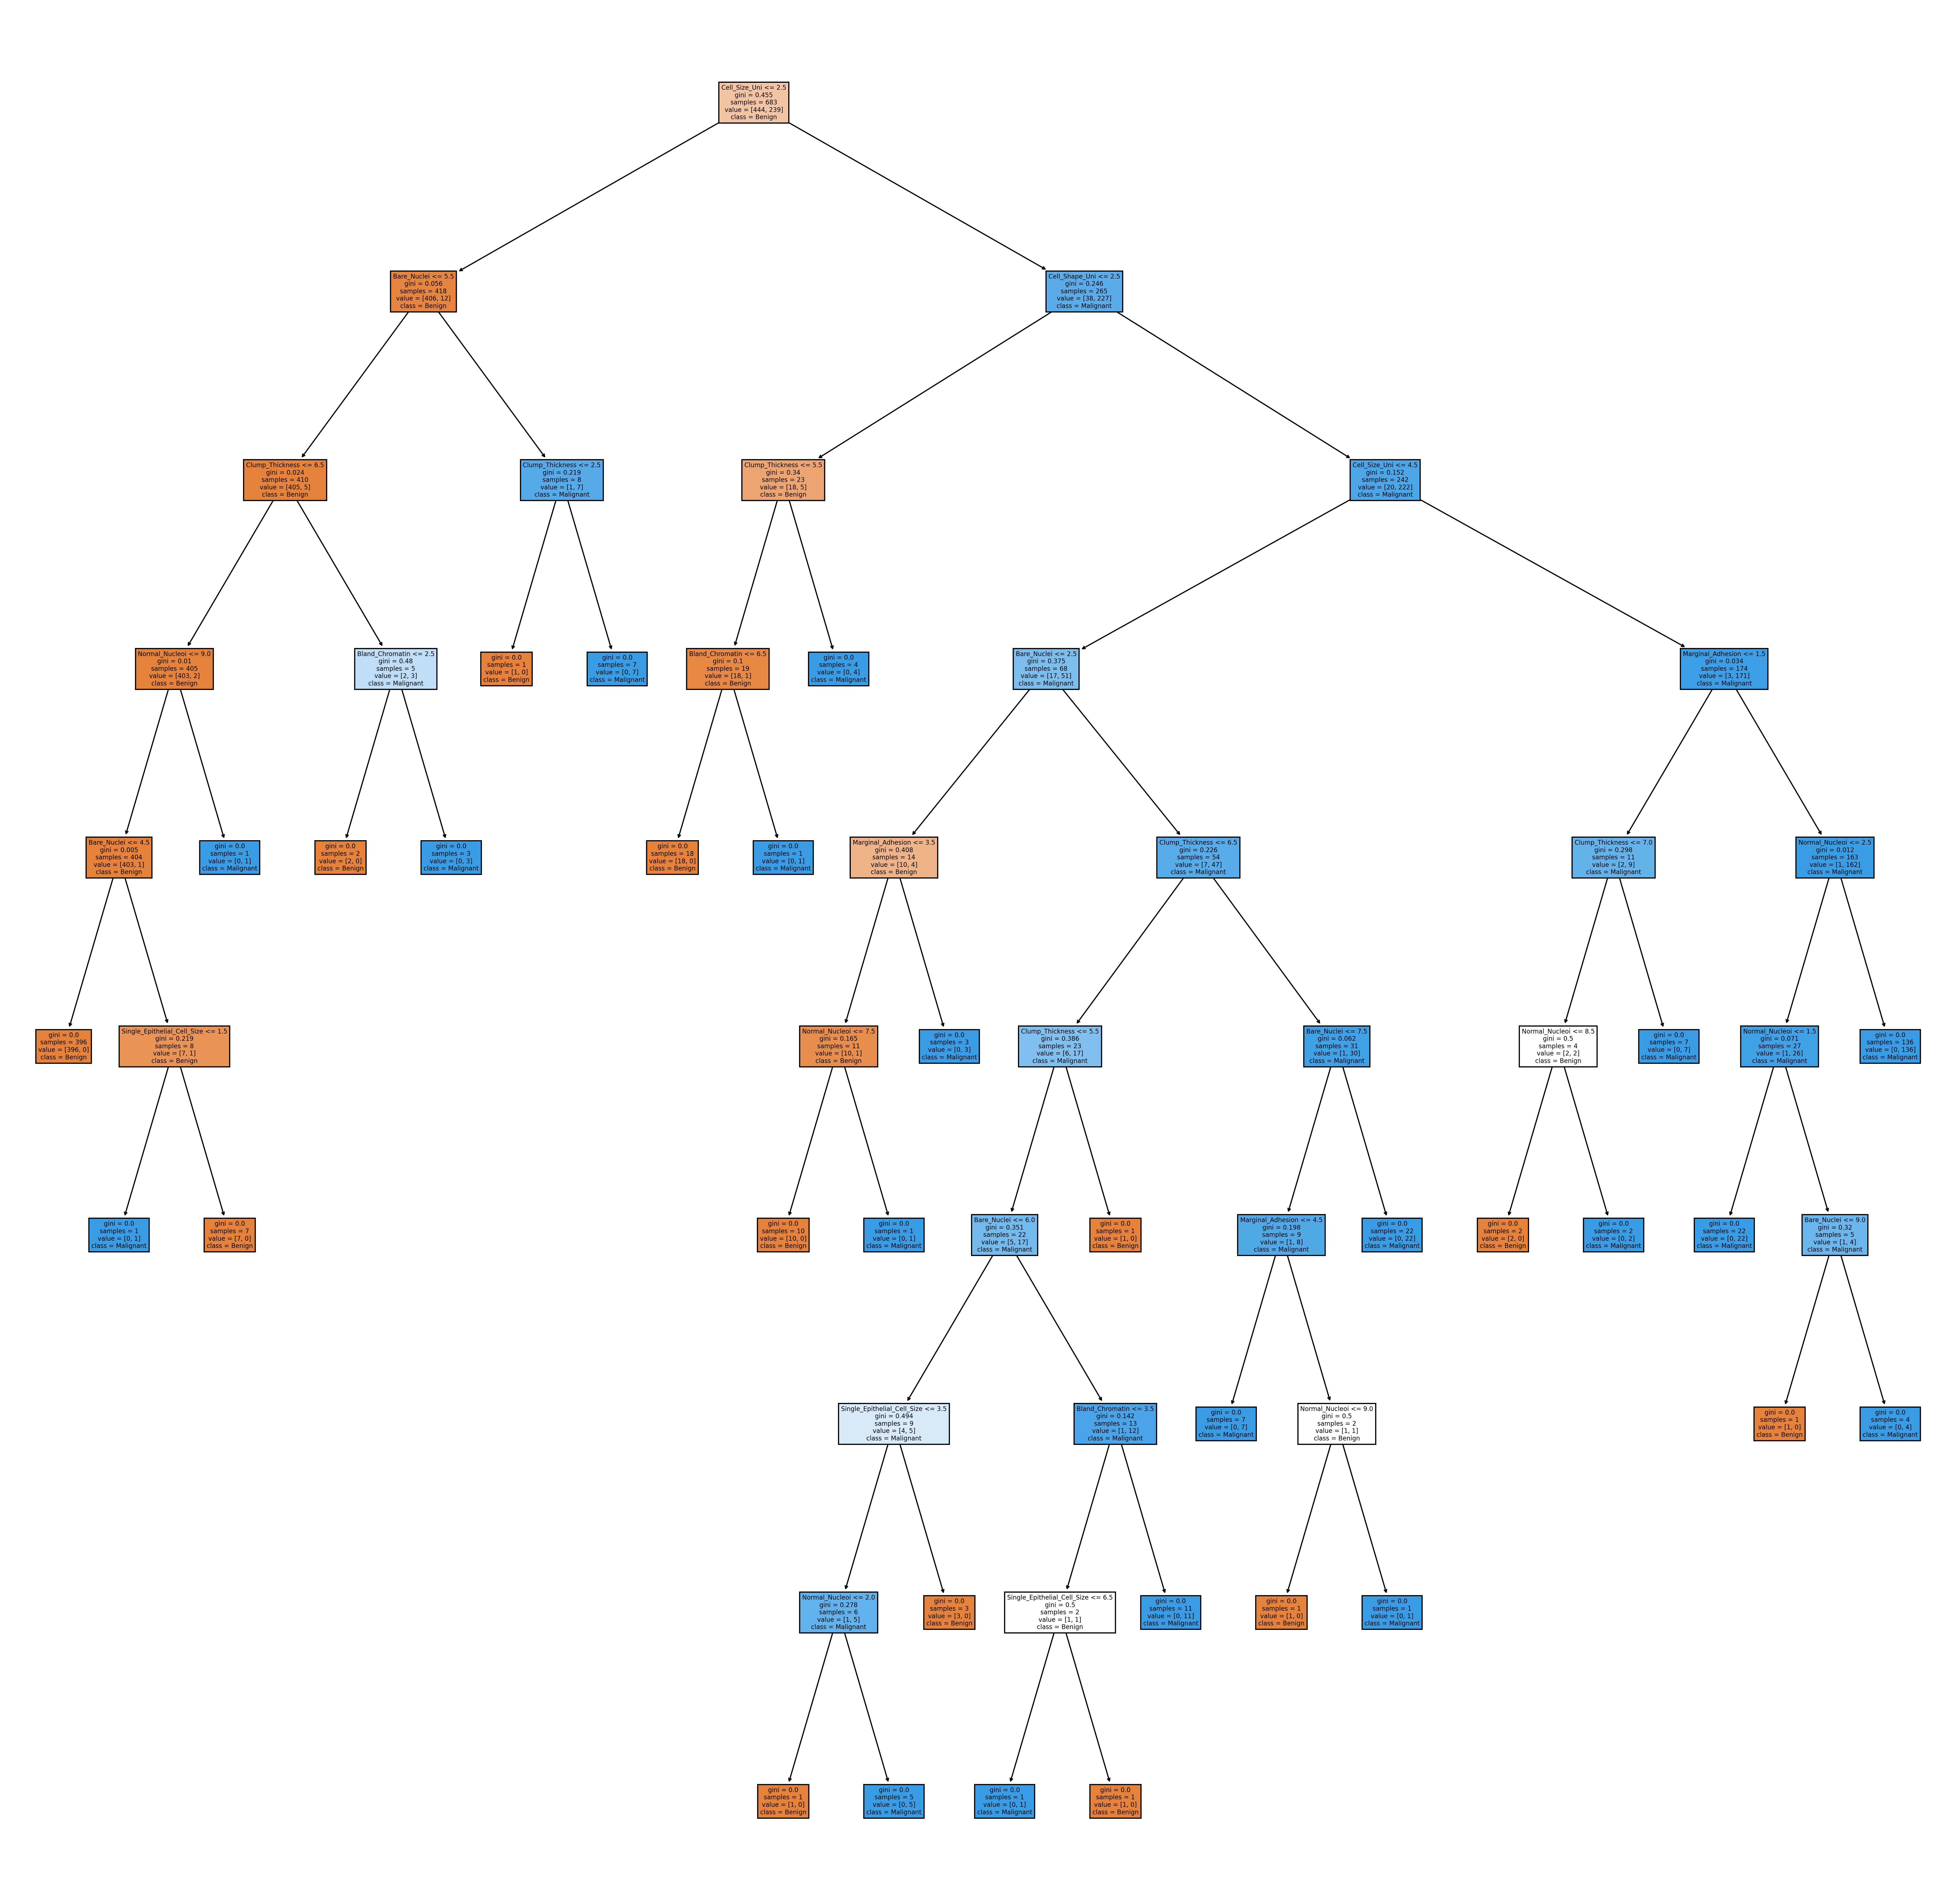

In [60]:
feature_names = X.keys()
class_names = ['Benign', 'Malignant']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (30,30), dpi=300)
tree.plot_tree(bcd_model, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()

In [64]:
accuracy_score(y,bcd_model.predict(X))

1.0

In [125]:
list(X.keys())

['Clump_Thickness',
 'Cell_Size_Uni',
 'Cell_Shape_Uni',
 'Marginal_Adhesion',
 'Single_Epithelial_Cell_Size',
 'Bare_Nuclei',
 'Bland_Chromatin',
 'Normal_Nucleoi',
 'Mitoses']

### Q2 (b) Use 10-fold cross-validation to estimate the error (again without pruning).

#### GridSearchCV instead of cross validation 

In [77]:
clf = GridSearchCV(tree.DecisionTreeClassifier(), {'max_depth':range(0,20), 'criterion': ['gini', 'entropy']}, n_jobs=5, cv=10)

In [78]:
%%time

clf.fit(X, y)

Wall time: 2.72 s


C:\Users\chint\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.89757033 0.9385763  0.93429241 0.94739983 0.94878517
 0.94298806 0.95027707 0.9443734  0.95029838 0.95174766 0.95758738
 0.95176897 0.94441603 0.94737852 0.95464621 0.95323956 0.95179028
 0.95317562 0.94739983        nan 0.9092711  0.91515345 0.94592924
 0.94298806 0.94447997 0.93866155 0.93866155 0.94011083 0.94445865
 0.94452259 0.94160273 0.94450128 0.94307332 0.94011083 0.9445439
 0.94013214 0.94450128 0.94744246 0.94452259]
  warnings.warn(


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=5,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 20)})

In [79]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=11)

In [80]:
clf.best_score_

0.9575873827791987

In [81]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 11}

In [92]:
# train-test split: 80% training (546 rows) and 20% testing (137 rows)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=len(X)/1000, random_state=0)
X_train, y_train, X_test, y_test

(         Clump_Thickness  Cell_Size_Uni  Cell_Shape_Uni  Marginal_Adhesion  \
 1268804              3.0            1.0             1.0                1.0   
 1298484             10.0            3.0             4.0                5.0   
 274137               8.0            8.0             9.0                4.0   
 749653               3.0            1.0             1.0                1.0   
 1176187              3.0            1.0             1.0                1.0   
 ...                  ...            ...             ...                ...   
 1033078              4.0            2.0             1.0                1.0   
 521441               5.0            1.0             1.0                2.0   
 1214092              1.0            1.0             1.0                1.0   
 1303489              3.0            1.0             1.0                1.0   
 378275              10.0            9.0             7.0                3.0   
 
          Single_Epithelial_Cell_Size  Bare_Nuclei

In [93]:
#accuracy_score(y_train, clf.predict(X_train)), 
accuracy_score(y_test, clf.predict(X_test))

1.0

In [97]:
%%time
# learn the tree with given best params in 10-fold cv

bcd_model = DTC(criterion='gini', max_depth=11)
bcd_model.fit(X_train, y_train)

Wall time: 0 ns


DecisionTreeClassifier(max_depth=11)

In [98]:
y_pred = bcd_model.predict(X_test)

In [99]:
accuracy_score(y_test, y_pred)

0.9486081370449678

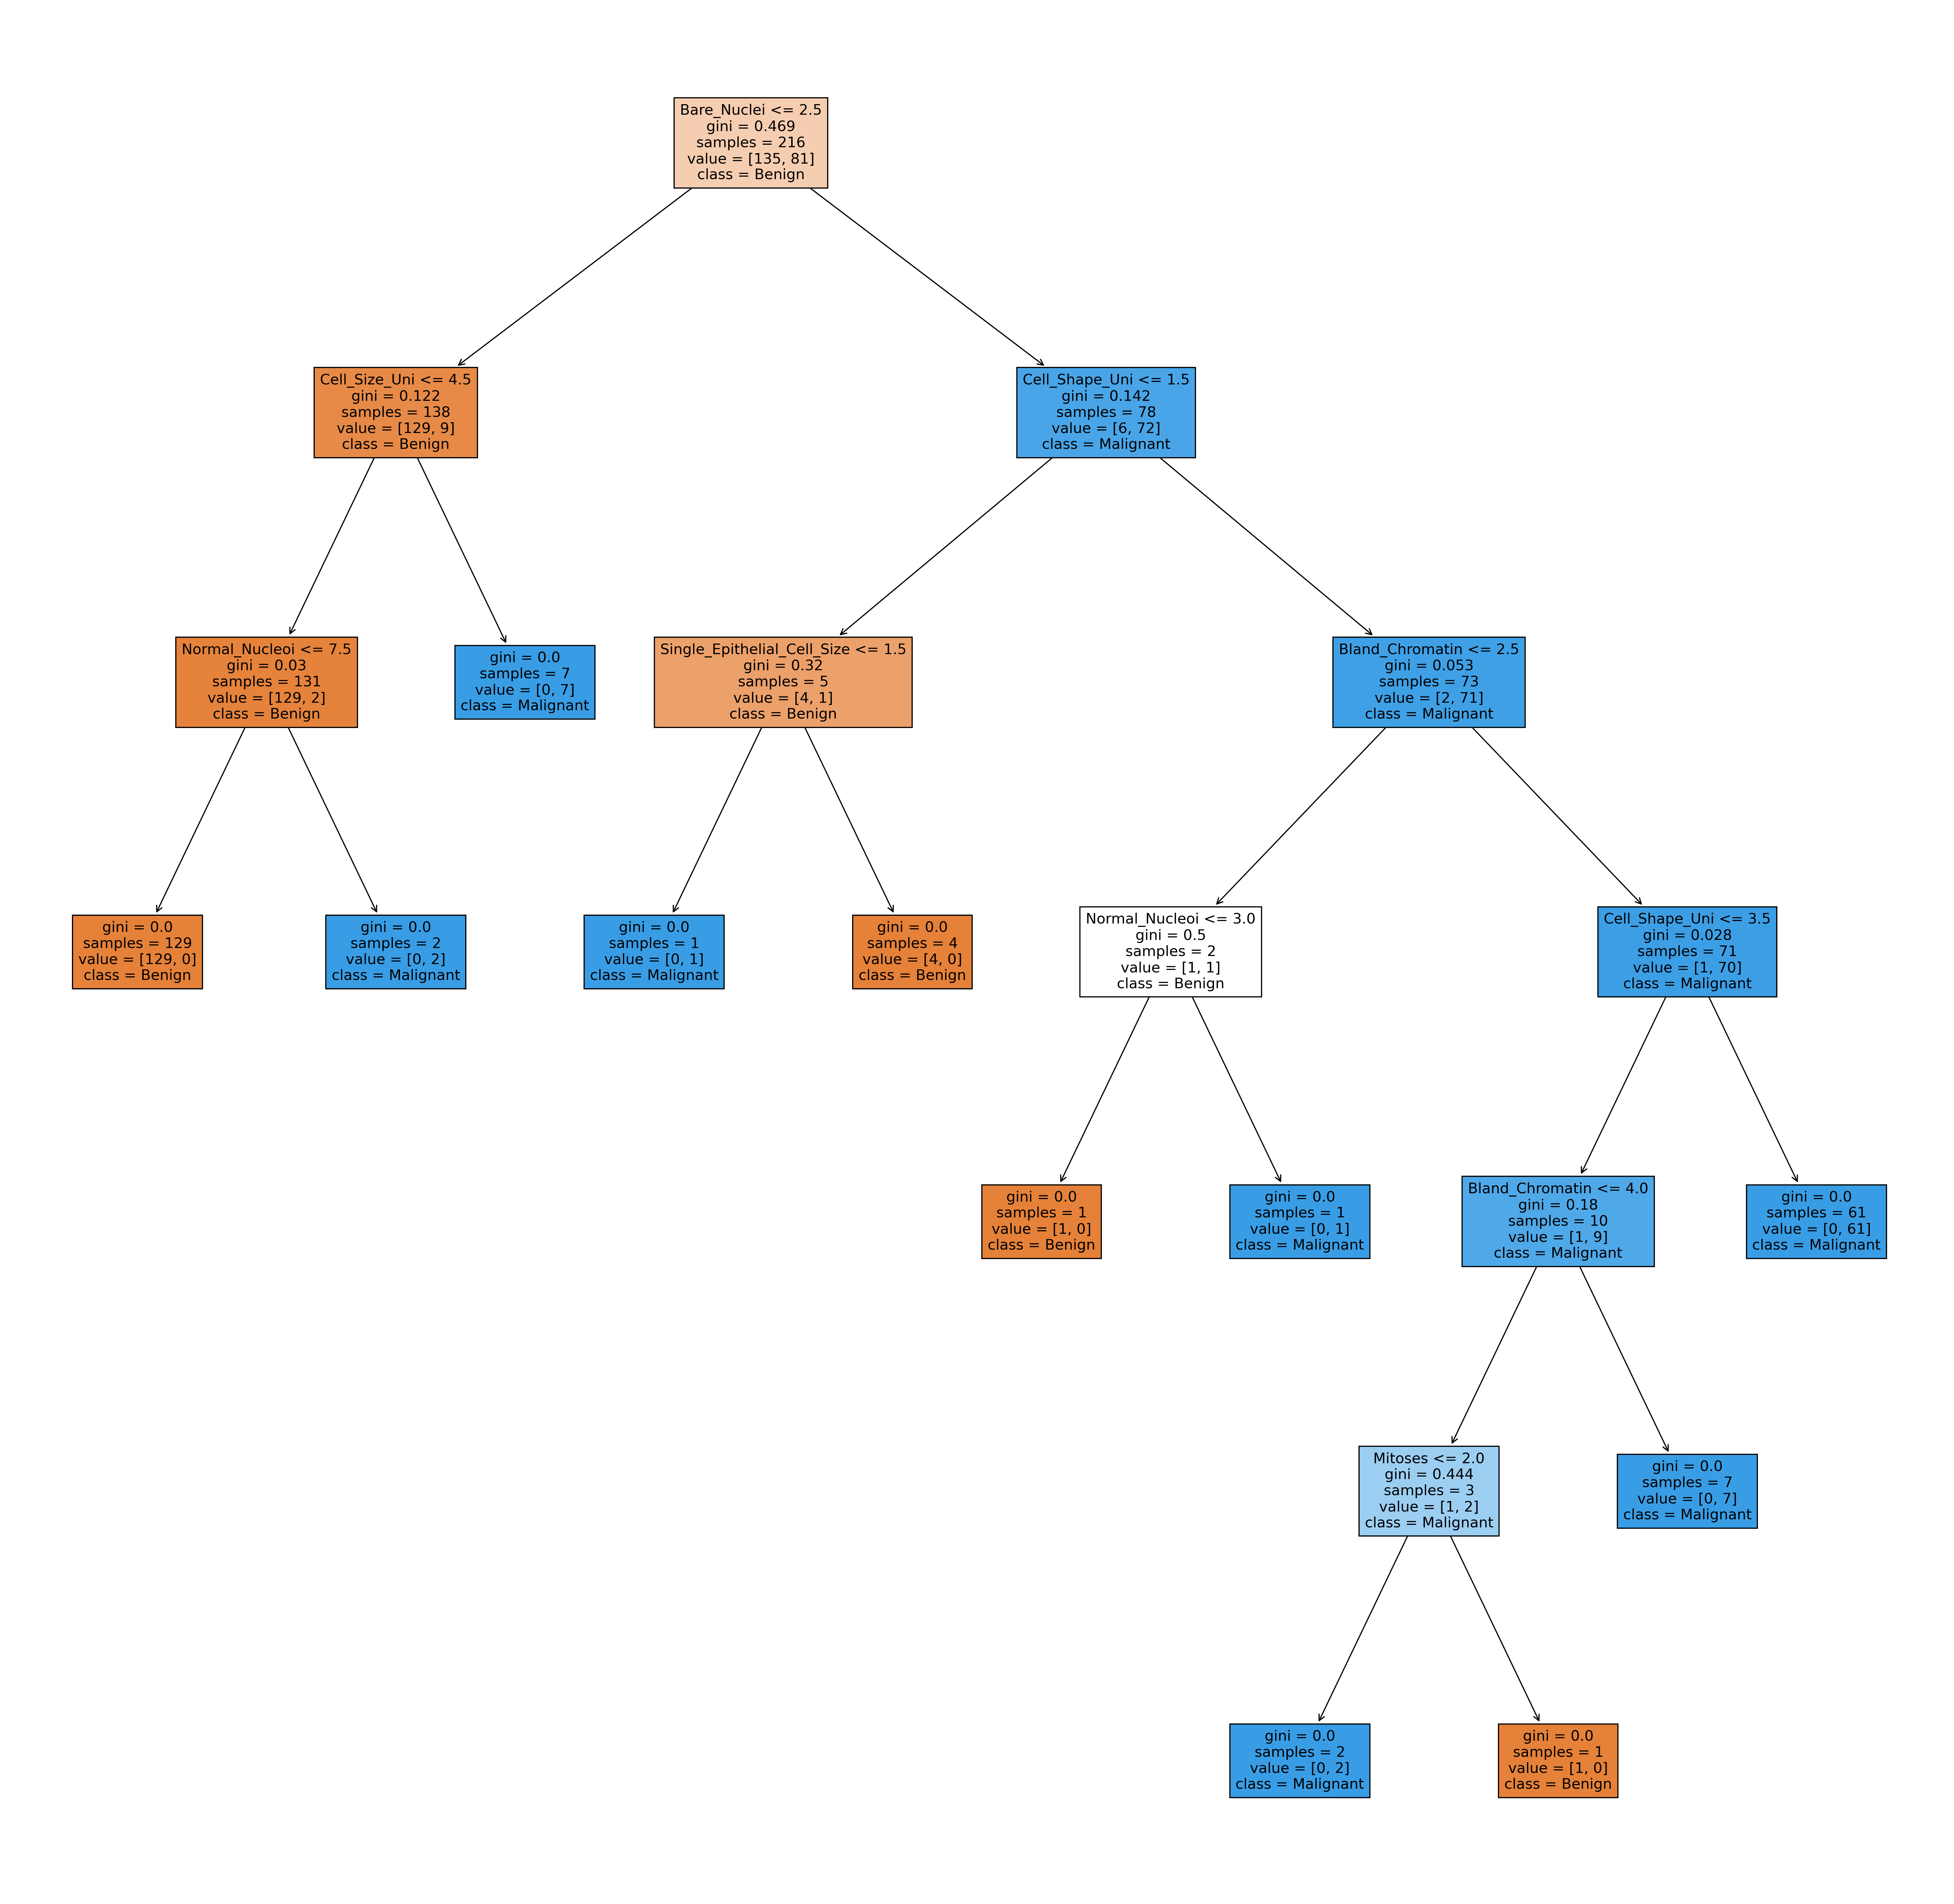

In [100]:
feature_names = X.keys()
class_names = ['Benign', 'Malignant']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (30,30), dpi=300)
tree.plot_tree(bcd_model, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()

### Pruning based on Tree-Depth(Pre-Pruning)

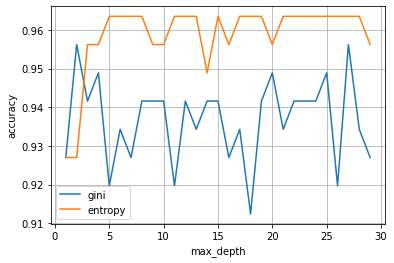

In [49]:
max_depth = []
acc_gini = []
acc_entropy = []

for i in range(1,30):
    ### gini index ###
    dtree = DTC(criterion='gini', max_depth=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    acc_gini.append(accuracy_score(y_test, pred))
    
    #### entropy ####
    dtree = DTC(criterion='entropy', max_depth=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    acc_entropy.append(accuracy_score(y_test, pred))
    
    ####
    max_depth.append(i)
    
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 'acc_entropy':pd.Series(acc_entropy), 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.grid(True)
plt.legend()

In [55]:
%%time

train_scores, test_scores = validation_curve(
    DTC(), X, y, param_name='max_depth', param_range=range(1,30), cv=10, scoring='accuracy', n_jobs=5)

Wall time: 1.22 s


In [54]:
train_scores, test_scores

(array([[0.93322476, 0.93973941, 0.93159609, 0.92520325, 0.9300813 ,
         0.93658537, 0.9300813 , 0.92520325, 0.9203252 , 0.92682927],
        [0.96416938, 0.96579805, 0.95928339, 0.95609756, 0.95772358,
         0.95772358, 0.95609756, 0.9495935 , 0.95121951, 0.9495935 ],
        [0.97068404, 0.96742671, 0.97068404, 0.96747967, 0.96747967,
         0.96747967, 0.95934959, 0.95934959, 0.97398374, 0.96422764],
        [0.98045603, 0.98371336, 0.98371336, 0.98373984, 0.97886179,
         0.97723577, 0.97235772, 0.97398374, 0.97560976, 0.97723577],
        [0.98859935, 0.99348534, 0.99022801, 0.98536585, 0.98373984,
         0.98373984, 0.9804878 , 0.9804878 , 0.97886179, 0.98699187],
        [0.99348534, 0.99837134, 0.99674267, 0.99186992, 0.9902439 ,
         0.99186992, 0.9902439 , 0.98861789, 0.98373984, 0.99349593],
        [0.99511401, 1.        , 0.99837134, 0.99512195, 0.99674797,
         0.99349593, 0.99512195, 0.9902439 , 0.98699187, 0.99837398],
        [0.99837134, 1.    

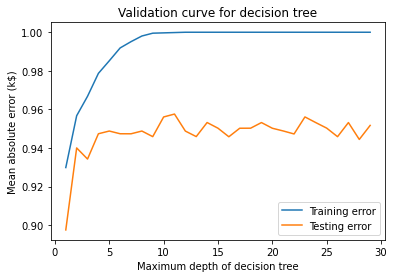

In [63]:
plt.plot(max_depth, train_scores.mean(axis=1), label="Training error")
plt.plot(max_depth, test_scores.mean(axis=1), label="Testing error")
plt.legend()

plt.xlabel("Maximum depth of decision tree")
plt.ylabel("Mean absolute error (k$)")
_ = plt.title("Validation curve for decision tree")

### Pruning based on Rules and Leaf Impurity (Post Pruning)

In [64]:
bcd_model = DTC()
path = bcd_model.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.        , 0.00121161, 0.00170068, 0.00237234, 0.00242711,
        0.00243697, 0.00274725, 0.0030525 , 0.00313972, 0.00359654,
        0.00549451, 0.01044277, 0.0107649 , 0.01792896, 0.02694849,
        0.32300322]),
 'impurities': array([0.        , 0.00363483, 0.00703619, 0.0141532 , 0.02143454,
        0.03118242, 0.03392967, 0.03698217, 0.04012189, 0.04731497,
        0.05280948, 0.06325225, 0.08478205, 0.10271101, 0.1296595 ,
        0.45266272])}

Text(0, 0.5, 'total impurity of leaves')

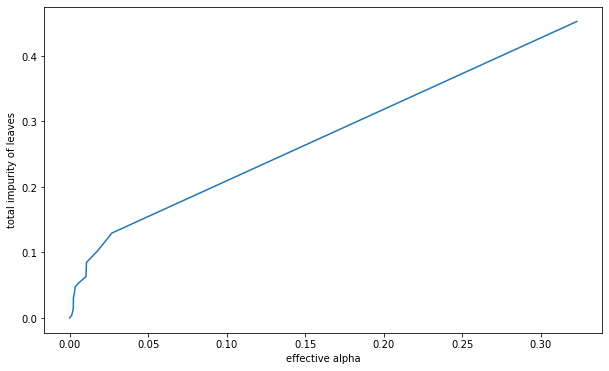

In [66]:
ccp_a, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_a, impurities)
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")

In [69]:
clfs = []

for ccp_alpha in ccp_a:
    clf = DTC(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Text(0, 0.5, 'total depth')

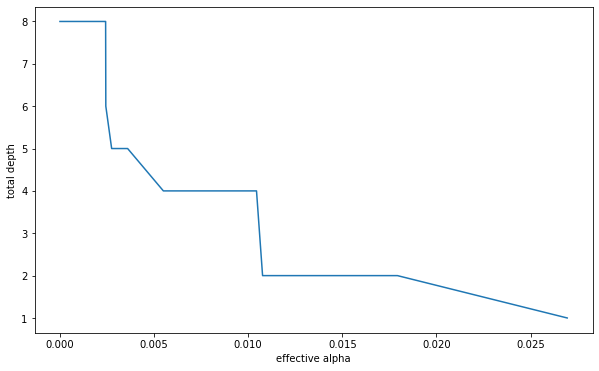

In [70]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_a[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("total depth")

Text(0, 0.5, 'Accuracy scores')

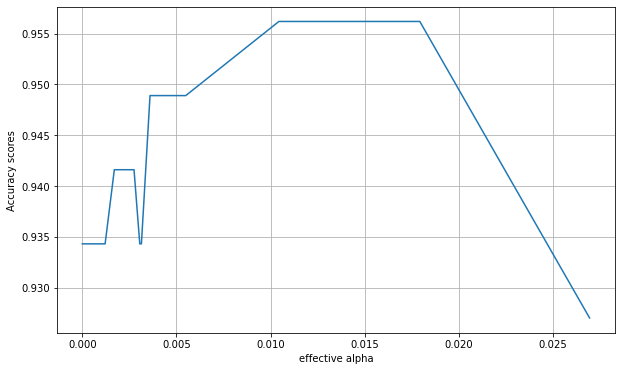

In [72]:
acc_scores = [accuracy_score(y_test, clf.predict(X_test)) for clf in clfs]

tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_a[:-1], acc_scores[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Accuracy scores")

In [74]:
bcd_model_pruned = DTC(max_depth=3)
bcd_model_pruned.fit(X_train, y_train)
y_pred = bcd_model_pruned.predict(X_test)
accuracy_score(y_test, y_pred)

0.948905109489051

### Error-based Pruning (Stop tree growth based on Train-Test error/accuracy trend)

In [103]:
bcd_model = DTC(random_state=40)

In [104]:
%%time


bcd_model.fit(X_train, y_train)

Wall time: 8 ms


DecisionTreeClassifier(random_state=40)

In [105]:
y_pred = bcd_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9486081370449678

In [106]:
path = bcd_model.cost_complexity_pruning_path(X_train, y_train)
alphas = path['ccp_alphas']
alphas

array([0.        , 0.00304295, 0.00444116, 0.00740741, 0.01823579,
       0.02586348, 0.05966276, 0.3395694 ])

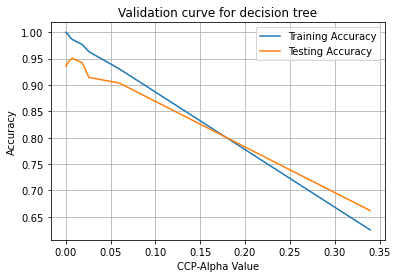

In [108]:
train_acc, test_acc = [],[]
for i in alphas:
    tree = DTC(ccp_alpha=i)
    tree.fit(X_train, y_train)
    
    y_train_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)
    
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

plt.plot(alphas, train_acc, label="Training Accuracy")
plt.plot(alphas, test_acc, label="Testing Accuracy")
plt.legend()
plt.grid()
plt.xlabel("CCP-Alpha Value")
plt.ylabel("Accuracy")
_ = plt.title("Validation curve for decision tree")

In [114]:
clf = GridSearchCV(DTC(ccp_alpha=0.015), {'max_depth':range(0,20), 'criterion': ['gini', 'entropy'], 'ccp_alpha':np.arange(0,1)}, n_jobs=5, cv=10)

In [115]:
%%time

clf.fit(X, y)

Wall time: 428 ms


C:\Users\chint\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.89757033 0.9385763  0.93282182 0.94887042 0.94733589
 0.94443734 0.94443734 0.9473572  0.94590793 0.95172634 0.95029838
 0.95025575 0.95319693 0.96048593 0.95027707 0.95172634 0.95174766
 0.95609548 0.95319693        nan 0.9092711  0.91515345 0.94739983
 0.94151748 0.94445865 0.9415601  0.93861893 0.94008951 0.94158142
 0.94160273 0.94160273 0.94160273 0.94597187 0.94011083 0.94447997
 0.94307332 0.94303069 0.94017477 0.94160273]
  warnings.warn(


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(ccp_alpha=0.015), n_jobs=5,
             param_grid={'ccp_alpha': array([0]),
                         'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 20)})

In [116]:
clf.best_estimator_

DecisionTreeClassifier(ccp_alpha=0, max_depth=14)

In [117]:
clf.best_score_

0.9604859335038363

In [118]:
clf.best_params_

{'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 14}

In [122]:
accuracy_score(y_train, clf.predict(X_train))

1.0